<center>
<img src="../../img/ods_stickers.jpg">
## Открытый курс по машинному обучению. Сессия № 3
Автор материала: программист-исследователь Mail.ru Group, старший преподаватель Факультета Компьютерных Наук ВШЭ Юрий Кашницкий. Материал распространяется на условиях лицензии [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/). Можно использовать в любых целях (редактировать, поправлять и брать за основу), кроме коммерческих, но с обязательным упоминанием автора материала.

# <center> Домашнее задание № 1
## <center> Анализ данных по сердечно-сосудистым заболеваниям
*Идеальный просмотр Jupyter notebooks возможен только локально, GitHub и nbviewer могут неправильно отбражать формулы или картинки.*

**В задании предлагается с помощью Pandas ответить на несколько вопросов по данным о сердечно-сосудистых заболеваниях (качать данные не надо, они уже есть в репозитории). Данные использовались в соревновании [Ml Boot Camp 5](http://mlbootcamp.ru/round/12/sandbox/).**

**Заполните код в клетках (где написано "Ваш код здесь") и ответьте на вопросы в [веб-форме](https://docs.google.com/forms/d/1KbWiGlupiSwYlqc8nmV6KjB3vNTI0C5hxZ6Tq3ZU4QA).**

В соревновании предлагалось определить наличие/отсутствие сердечно-сосудистых заболеваний (ССЗ) по результатам осмотра пациента.

**Описание данных.**

Датасет сформирован из реальных клинических анализов, и в нём используются признаки, которые можно разбить на 3 группы:

Объективные признаки:

 - Возраст (age)
 - Рост (height)
 - Вес (weight)
 - Пол (gender)
 

Результаты измерения:

 - Артериальное давление верхнее и нижнее (ap_hi, ap_lo)
 - Холестерин (cholesterol)
 - Глюкоза (gluc)
 

Субъективные признаки (со слов пациентов):

 - Курение (smoke)
 - Употребление алкоголя (alco)
 - Физическая активность (active)
 
Целевой признак (который интересно будет прогнозировать):
 - Наличие сердечно-сосудистых заболеваний по результатам классического врачебного осмотра (cardio)

Значения показателей холестерина и глюкозы представлены одним из трех классов: норма, выше нормы, значительно выше нормы. Значения субъективных признаков — бинарны.

Все показатели даны на момент осмотра.

Мы будем работать только с обучающей выборкой и с помощью `Pandas` проведем первичный анализ данных. 

Из библиотек нам понадобятся только `NumPy` и `Pandas`.

In [42]:
import numpy as np
import pandas as pd
%matplotlib inline

Считываем данные из CSV-файла в объект pandas DataFrame.  

In [3]:
df = pd.read_csv('mlbootcamp5_train.csv', sep=';', 
                 index_col='id')

Посмотрим на первые 5 записей.

In [4]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


**<font color='red'>Вопрос 1 (1 балл).</font> Сколько мужчин и женщин представлено в этом наборе данных? Не было дано расшифровки признака "пол" (какому полу соответствует 1, а какому – 2 в признаке ``gender``) – это определите, посмотрев также на рост при разумном предположении, что в среднем мужчины выше (здесь и далее под средним понимается среднее арифметическое).**

**<font color='red'>Варианты:</font>**
- 45470 женщин и 24530 мужчин
- 45470 мужчин и 24530 женщин
- 45530 женщин и 24470 мужчин
- 45530 мужчин и 24470 женщин

In [10]:
df.shape[0]

70000

In [19]:
print(df[df['gender'] == 1]['height'].mean())
print(df[df['gender'] == 2]['height'].mean())

161.35561168460356
169.94789538210054


In [22]:
print(df[df['gender'] == 1]['height'].median())
print(df[df['gender'] == 2]['height'].median())

161.0
170.0


1 - женщины
2 - мужчины

In [23]:
df['gender'].value_counts()

1    45530
2    24470
Name: gender, dtype: int64

In [ ]:
45530 женщин
24470 мужчин

**<font color='red'>Вопрос 2 (1 балл).</font> Кто в среднем реже указывает, что употребляет алкоголь – мужчины или женщины?**

**<font color='red'>Варианты:</font>**
- мужчины 
- женщины

In [25]:
df[df['gender'] == 1]['alco'].mean()

0.02549967054689216

In [26]:
df[df['gender'] == 2]['alco'].mean()

0.10637515324887617

In [27]:
df[df['gender'] == 2]['alco'].mean() > df[df['gender'] == 1]['alco'].mean()

True

Женщины

**<font color='red'>Вопрос 3 (1 балл).</font> Во сколько раз (округленно, `round`) процент курящих среди мужчин больше, чем процент курящих среди женщин (по крайней мере, по этим анкетным данным)?**

**<font color='red'>Варианты:</font>**
- 4
- 8
- 12
- 16

In [28]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [32]:
smoking_fraction_men = df[(df['gender'] == 2) & (df['smoke'] == 1)].shape[0] / df[df['gender'] == 2].shape[0]
smoking_fraction_women = df[(df['gender'] == 1) & (df['smoke'] == 1)].shape[0] / df[df['gender'] == 1].shape[0]
round(smoking_fraction_men / smoking_fraction_women)

12

В 12

**<font color='red'>Вопрос 4 (1 балл).</font> Вы наверняка заметили, что значения возраста какие-то странные. Догадайтесь, в чём здесь измеряется возраст, и ответьте, на сколько месяцев (примерно) отличаются медианные значения возраста курящих и некурящих.**

**<font color='red'>Варианты:</font>**
- 10
- 15
- 20
- 25

In [35]:
df.head(3)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1


In [46]:
(df['age'] / 365).max()

64.967123287671228

In [47]:
(df['age'] / 365).min()

29.583561643835615

In [48]:
(df['age'] / 365).median()

53.98082191780822

In [49]:
(df['age'] / 365).mean()

53.33935839530379

Возраст измеряется в днях

In [50]:
(df[df['smoke'] == 1]['age'] / 30).median()

637.5

In [60]:
(df[df['smoke'] == 0]['age'].median() - df[df['smoke'] == 1]['age'].median()) / 30

19.9

На 20

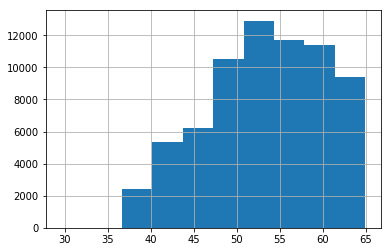

In [43]:
(df['age'] / 365).hist();

**<font color='red'>Вопрос 5 (2 балла).</font> В [статье](https://ru.wikipedia.org/wiki/Сердечно-сосудистый_риск) на Википедии про сердечно-сосудистый риск показана шкала SCORE для расчёта риска смерти от сердечно-сосудистого заболевания в ближайшие 10 лет. Вот она:**
<img src='https://habrastorage.org/webt/gg/38/vf/gg38vfl5ql8obqjmlsvt9es76p8.png' width=70%>

Давайте посмотрим на правый верхний прямоугольник, отображающий сегмент курящих мужчин в возрасте от 60 до 64 лет включительно. (Неочевидно, но тут для возраста и давления цифры означают верхнюю границу, и она не включается).

Видим 9-ку в левом нижнем углу этого прямоугольника и 47 – в правом верхнем. То есть если при этом систолическое (т.е. верхнее) артериальное давление – меньше 120 мм рт.ст., а уровень холестерина – 4 ммоль/л, то риск ССЗ оценивается примерно в 5 раз ниже, чем если бы давление лежало в интервале [160, 180), а холестерина было бы 8 ммоль/л.

Давайте посчитаем аналогичное значение, но на наших данных. 

Уточнения:
- Создайте новый признак ``age_years`` – возраст в годах, округлив до целых (`round`). Для данного примера отберите курящих мужчин от 60 до 64 лет включительно
- Категории уровня холестрина на рисунке и в наших данных отличаются. Отображение значений на картинке в значения признака ``cholesterol`` следующее: 4 ммоль/л $\rightarrow$ 1, 5-7 ммоль/л $\rightarrow$ 2, 8 ммоль/л $\rightarrow$ 3.
- Интересуют 2 подвыборки курящих мужчин возраста от 60 до 64 лет включительно: первая с верхним артериальным давлением строго меньше 120 мм рт.ст. и концентрацией холестерина – 4 ммоль/л, а вторая – с верхним артериальным давлением от 160 (включительно) до 180 мм рт.ст. (не включительно) и концентрацией холестерина – 8 ммоль/л.

Во сколько раз (округленно, `round`) отличаются доли больных людей (согласно целевому признаку, `cardio`) в этих двух подвыборках? Посчитайте на наших данных.

In [65]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years
id,,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,52
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,48


**<font color='red'>Варианты:</font>**
- 2
- 3
- 4
- 5

In [63]:
df['age_years'] = df['age'].apply(lambda x: round(x / 365)).astype('int64')

In [64]:
df['age_years'].describe()

count    70000.000000
mean        53.338686
std          6.765294
min         30.000000
25%         48.000000
50%         54.000000
75%         58.000000
max         65.000000
Name: age_years, dtype: float64

In [75]:
df[(df['age_years'].apply(lambda x: x in np.arange(60, 65))) & (df['ap_hi'] < 120) & (df['cholesterol'] == 1)]['age_years'].describe()

count    1299.000000
mean       61.600462
std         1.573480
min        60.000000
25%        60.000000
50%        62.000000
75%        63.000000
max        64.000000
Name: age_years, dtype: float64

In [76]:
df[(df['age_years'].apply(lambda x: x in np.arange(60, 65))) & (df['ap_hi'] < 120) & (df['cholesterol'] == 1)]['ap_hi'].describe()

count    1299.000000
mean      104.717475
std        17.485572
min      -150.000000
25%       100.000000
50%       110.000000
75%       110.000000
max       119.000000
Name: ap_hi, dtype: float64

In [84]:
df[(df['age_years'].apply(lambda x: x in np.arange(60, 65))) & (df['ap_hi'] < 120) & (df['cholesterol'] == 1)]['cholesterol'].value_counts()


1    1299
Name: cholesterol, dtype: int64


In [85]:
sick_people_in_first_cat = df[(df['age_years'].apply(lambda x: x in np.arange(60, 65))) & (df['ap_hi'] < 120) & (df['cholesterol'] == 1)]['cardio'].mean()
print(sick_people_in_first_cat)

0.3987682832948422


In [96]:
sick_people_in_second_cat = df[((df['age_years'] >= 60) & df['age_years'] <= 64) & ((df['ap_hi'] >= 160) & (df['ap_hi'] < 180)) & (df['cholesterol'] == 3)]['cardio'].mean()
print(sick_people_in_second_cat)

0.8667582417582418


In [105]:
sick_2_cat_2_vat = df[(df['age_years'].apply(lambda x: x in np.arange(60, 65))) & \
                      (df['ap_hi'].apply(lambda x: x in np.arange(160, 180))) & \
                     (df['cholesterol'] == 3)]['cardio'].mean()
print(sick_2_cat_2_vat)

0.8741721854304636


In [87]:
round(sick_people_in_second_cat / sick_people_in_first_cat)

2

In [106]:
round(sick_2_cat_2_vat / sick_people_in_first_cat)

2

Ответ: в 2.

**<font color='red'>Вопрос 6 (2 балла).</font> Постройте новый признак – BMI ([Body Mass Index](https://en.wikipedia.org/wiki/Body_mass_index)). Для этого надо вес в килограммах поделить на квадрат роста в метрах. Нормальными считаются значения BMI от 18.5 до 25. Выберите верные утверждения.**

In [108]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years
id,,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,52
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,48


In [120]:
df.shape

(70000, 13)

In [118]:
df.apply?

In [125]:
df['BMI'] = df['weight'] / np.square(df['height'] / 100)

In [128]:
df['BMI'].describe()

count    70000.000000
mean        27.556513
std          6.091511
min          3.471784
25%         23.875115
50%         26.374068
75%         30.222222
max        298.666667
Name: BMI, dtype: float64

In [129]:
df[df['gender'] == 1]['BMI'].mean() < df[df['gender'] == 2]['BMI'].mean()

False

In [130]:
df[df['gender'] == 1]['BMI'].mean()

27.98758344183312

In [131]:
df[df['gender'] == 2]['BMI'].mean()

26.754442357289474

In [132]:
df[df['cardio'] == 0]['BMI'].mean() > df[df['cardio'] == 1]['BMI'].mean()

False

In [133]:
df[df['cardio'] == 0]['BMI'].mean() # здоровые

26.54817520679475

In [134]:
df[df['cardio'] == 1]['BMI'].mean() # больные

28.566060627015435

In [136]:
df[(df['gender'] == 2) & (df['cardio'] == 0) & (df['alco'] == 0)]['BMI'].mean() # здоровые непьющие мужчины

25.872638075460173

In [137]:
df[(df['gender'] == 1) & (df['cardio'] == 0) & (df['alco'] == 0)]['BMI'].mean() # здоровые непьющие женщины

26.845406594131518

**<font color='red'>Утверждения:</font>**
- Медианный BMI по выборке превышает норму
- У женщин в среднем BMI ниже, чем у мужчин
- У здоровых в среднем BMI выше, чем у больных
- В сегменте здоровых и непьющих мужчин в среднем BMI ближе к норме, чем в сегменте здоровых и непьющих женщин

Ответ
- Медианный BMI по выборке превышает норму
- В сегменте здоровых и непьющих мужчин в среднем BMI ближе к норме, чем в сегменте здоровых и непьющих женщин


**<font color='red'>Вопрос 7 (2 балла).</font> ** Можно заметить, что данные не особо-то чистые, много в них всякой "грязи" и неточностей. Еще лучше мы это увидим, когда обсудим визуализацию данных.

Отфильтруйте следующие сегменты пациентов (считаем это ошибками в данных)
- указанное нижнее значение артериального давления строго выше верхнего
- рост строго меньше 2.5%-перцентили или строго больше 97.5%-перцентили (используйте `pd.Series.quantile`, если не знаете, что это такое – прочитайте)
- вес строго меньше 2.5%-перцентили или строго больше 97.5%-перцентили

Этот вовсе не вся чистка данных, которую можно было проделать, но пока остановимся на этом.

Сколько процентов данных (округленно, `round`) мы выбросили?

**<font color='red'>Варианты:</font>**
- 8
- 9
- 10
- 11

In [168]:
df.shape

(70000, 14)

In [189]:
df_1 = df[df['ap_hi'] >= df['ap_lo']]

In [190]:
df_1[['ap_lo', 'ap_hi']].tail()

,ap_lo,ap_hi
id,,
99993,80,120
99995,90,140
99996,90,180
99998,80,135
99999,80,120


In [195]:
df_2 = df_1[(df_1['height'] >= df_1['height'].quantile(0.025)) & (df_1['height'] <= df_1['height'].quantile(0.975))]

In [196]:
print("Рост: квантиль 2.5%", df_1['height'].quantile(0.025), sep = ' - ')

Рост: квантиль 2.5% - 150.0


In [197]:
print("Рост: квантиль 97.5%", df_1['height'].quantile(0.975), sep = ' - ')

Рост: квантиль 97.5% - 180.0


In [198]:
df_3 = df_2[(df_2['weight'] >= df_2['weight'].quantile(0.025)) & (df_2['weight'] <= df_2['weight'].quantile(0.975))]

In [199]:
print("Вес: квантиль 2.5%", df_2['weight'].quantile(0.025))
print('Вес: квантиль 97.5%', df_2['weight'].quantile(0.975))

Вес: квантиль 2.5% 52.0
Вес: квантиль 97.5% 106.0


In [200]:
df_3['weight'].tail()

id
99991    70.0
99992    80.0
99993    76.0
99998    72.0
99999    72.0
Name: weight, dtype: float64

In [165]:
df_3.shape

(4, 14)

In [166]:
df.shape

(70000, 14)

In [204]:
round((df.shape[0] - df_3.shape[0]) / (df.shape[0]) * 100)

10

Ответ: 10